In [24]:
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

key = os.getenv('key')
id = os.getenv('id')
def Data_load2():
    basic_data = []
    country_data = []
    for action in ['dailySalesList', 'dailyCountyList']:
        if action == 'dailySalesList':
            url = f'http://www.kamis.or.kr/service/price/xml.do?action={action}&p_cert_key={key}&p_cert_id={id}&p_returntype=json'
            response = requests.get(url)
            data = response.json()
            basic_data.extend(data['price'])
        else:
            for county in [1101,2100,2200,2300,2401,2501,2601,3111,3211,3311,3511,3711,3911,3113,3613,3714,3814,3145]:
                url = f'http://www.kamis.or.kr/service/price/xml.do?action={action}&p_cert_key={key}&p_cert_id={id}&p_returntype=json&p_countycode={county}'
                response = requests.get(url)
                data = response.json()
                country_data.extend(data['price'])
        
    return pd.DataFrame(basic_data) , pd.DataFrame(country_data) 

basic_data, country_data = Data_load2()

In [41]:
country_data.groupby('category_name')['dpr1'].min()

category_name
과일류      1,990
수산물      1,705
식량작물    10,020
식품      10,530
채소류      1,025
축산물      1,061
특용작물     1,422
Name: dpr1, dtype: object

In [50]:
country_data.columns

Index(['county_code', 'county_name', 'product_cls_code', 'product_cls_name',
       'category_code', 'category_name', 'productno', 'lastest_day',
       'productName', 'item_name', 'unit', 'day1', 'dpr1', 'day2', 'dpr2',
       'day3', 'dpr3', 'day4', 'dpr4', 'direction', 'value'],
      dtype='object')

In [54]:
country_data = country_data.drop(['county_code','product_cls_code','category_code','productName'],axis=1)
country_data.head()

,county_name,product_cls_name,category_name,productno,lastest_day,item_name,unit,day1,dpr1,day2,dpr2,day3,dpr3,day4,dpr4,direction,value
0,서울,"[소매, 소매]",식량작물,272,2024-03-21,쌀/20kg,20kg,당일,"51,189",1일전,"52,522",1개월전,"54,744",1년전,"49,189",0,2.5
1,서울,"[소매, 소매]",식량작물,1537,2024-03-21,쌀/10kg,10kg,당일,"29,331",1일전,"29,109",1개월전,"28,887",1년전,[],1,0.8
2,서울,"[소매, 소매]",식량작물,274,2024-03-21,찹쌀/일반계,1kg,당일,"3,911",1일전,"3,911",1개월전,"3,643",1년전,"3,539",2,0.0
3,서울,"[소매, 소매]",식량작물,275,2024-03-21,콩/흰 콩(국산),500g,당일,"5,313",1일전,"5,313",1개월전,"5,228",1년전,"6,367",2,0.0
4,서울,"[소매, 소매]",식량작물,277,2024-03-21,팥/붉은 팥(국산),500g,당일,"8,859",1일전,"8,859",1개월전,"8,388",1년전,"8,054",2,0.0


### 등락율 비교

In [71]:
country_data['value'].value_counts()

value
0.0     1305
0.2       19
1.8       17
0.9       17
0.1       17
        ... 
24.7       1
8.9        1
17.0       1
20.2       1
23.5       1
Name: count, Length: 217, dtype: int64

In [72]:
country_data['value'] = pd.to_numeric(country_data['value'])

In [78]:
sorted_value.groupby('category_name')['value'].max()

category_name
과일류     58.2
수산물     43.1
식량작물    15.0
식품      28.7
채소류     45.9
축산물     25.9
특용작물    31.0
Name: value, dtype: float64

In [86]:
country_data.groupby('category_name')['value'].max()

category_name
과일류     58.2
수산물     43.1
식량작물    15.0
식품      28.7
채소류     45.9
축산물     25.9
특용작물    31.0
Name: value, dtype: float64

In [114]:
category_cheaper_data['category_name'].value_counts()

category_name
과일류     5
수산물     5
식량작물    5
식품      5
채소류     5
축산물     5
특용작물    5
Name: count, dtype: int64

<Axes: xlabel='item_name', ylabel='value'>

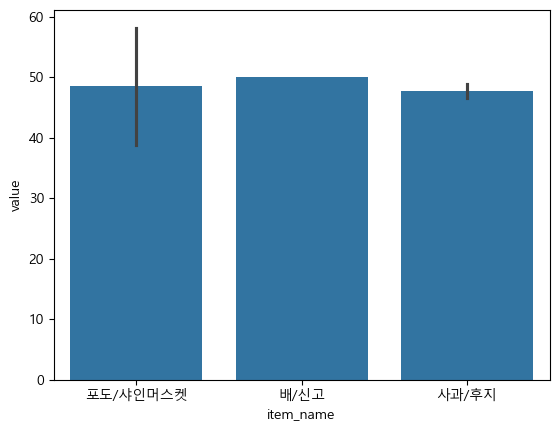

In [119]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

top_index = country_data.groupby('category_name')['value'].nlargest(5).index.values
number_list = []
for category_name, value in top_index:
    number_list.append(int(value))
category_cheaper_data = country_data.loc[number_list]

fruit = category_cheaper_data[category_cheaper_data['category_name']=='과일류']
su = category_cheaper_data[category_cheaper_data['category_name']=='수산물']
sik = category_cheaper_data[category_cheaper_data['category_name']=='식량작물']
food = category_cheaper_data[category_cheaper_data['category_name']=='식품']
vegetable = category_cheaper_data[category_cheaper_data['category_name']=='채소류']
livestock  = category_cheaper_data[category_cheaper_data['category_name']=='축산물']
special = category_cheaper_data[category_cheaper_data['category_name']=='특용작물']
sns.barplot(x="item_name", y="value" ,data=fruit)
# category_cheaper_data

In [121]:
import streamlit as st
import pandas as pd
import plotly.express as px
category_name = st.selectbox('카테고리 선택', category_cheaper_data['category_name'])
selected_data = category_cheaper_data[category_cheaper_data['category_name'] == category_name]
fig = px.bar(selected_data, x="item_name", y="value")
st.plotly_chart(fig)

2024-03-22 14:54:38.451 
  command:

    streamlit run c:\Users\User\document\공부\project\sijang_project\myvenv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [45]:
country_data['category_name'].value_counts()

category_name
채소류     799
축산물     483
과일류     212
수산물     197
식량작물    186
식품      127
특용작물    124
Name: count, dtype: int64

In [44]:
country_data['unit'].value_counts()

unit
100g             775
1kg              345
1개               214
10개              127
10kg              75
500g              64
1마리               60
20kg              50
1포기               49
2kg               38
5kg               37
1묶음               31
4kg               30
8kg               20
40kg              19
30구               18
1L                18
150g              17
200g              17
1봉                16
30kg              15
600g              14
15kg              10
2마리                9
10구                7
10kg(그물망 3포기)      5
100개               5
20개                5
7.5kg              5
22.5kg             5
13kg               5
12kg               5
18kg               5
17kg               5
1.5kg              5
50개                3
Name: count, dtype: int64

In [36]:
country_data.head(3)

,county_code,county_name,product_cls_code,product_cls_name,category_code,category_name,productno,lastest_day,productName,item_name,...,day1,dpr1,day2,dpr2,day3,dpr3,day4,dpr4,direction,value
0,1101,서울,"[01, 01]","[소매, 소매]",100,식량작물,272,2024-03-21,쌀/20kg,쌀/20kg,...,당일,"51,189",1일전,"52,522",1개월전,"54,744",1년전,"49,189",0,2.5
1,1101,서울,"[01, 01]","[소매, 소매]",100,식량작물,1537,2024-03-21,쌀/10kg,쌀/10kg,...,당일,"29,331",1일전,"29,109",1개월전,"28,887",1년전,[],1,0.8
2,1101,서울,"[01, 01]","[소매, 소매]",100,식량작물,274,2024-03-21,찹쌀/일반계,찹쌀/일반계,...,당일,"3,911",1일전,"3,911",1개월전,"3,643",1년전,"3,539",2,0.0


In [31]:
country_data[['day1','dpr1'	,'day2'	,'dpr2'	,'day3'	,'dpr3' ,'day4','dpr4']]

,day1,dpr1,day2,dpr2,day3,dpr3,day4,dpr4
0,당일,"51,189",1일전,"52,522",1개월전,"54,744",1년전,"49,189"
1,당일,"29,331",1일전,"29,109",1개월전,"28,887",1년전,[]
2,당일,"3,911",1일전,"3,911",1개월전,"3,643",1년전,"3,539"
3,당일,"5,313",1일전,"5,313",1개월전,"5,228",1년전,"6,367"
4,당일,"8,859",1일전,"8,859",1개월전,"8,388",1년전,"8,054"
...,...,...,...,...,...,...,...,...
2123,당일,"9,600",1일전,"9,600",1개월전,"19,200",1년전,[]
2124,당일,"33,800",1일전,"33,800",1개월전,"33,800",1년전,[]
2125,당일,"5,480",1일전,"5,480",1개월전,"5,480",1년전,[]
2126,당일,"10,800",1일전,"10,800",1개월전,"10,800",1년전,[]


In [20]:
country_data['product_cls_name'] = country_data['product_cls_name'].str.replace('[', '')

In [26]:
country_data['category_name'].value_counts()

category_name
채소류     799
축산물     483
과일류     212
수산물     197
식량작물    186
식품      127
특용작물    124
Name: count, dtype: int64

In [11]:
country_data.columns

Index(['county_code', 'county_name', 'product_cls_code', 'product_cls_name',
       'category_code', 'category_name', 'productno', 'lastest_day',
       'productName', 'item_name', 'unit', 'day1', 'dpr1', 'day2', 'dpr2',
       'day3', 'dpr3', 'day4', 'dpr4', 'direction', 'value'],
      dtype='object')